<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Heart_Disease_Prediction_Classification_model_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Report: Applying Linear Regression to Classification**

### **Heart Disease Prediction Classification model using Linear Regression:**

**Introduction:**

* Machine Learning models, are widely used in medical diagnosis, where classification tasks are crucial for decision-making.

* The Heart Disease dataset from the UCI Machine Learning repository was chosen for this project because it is a well-known dataset in the medical domain, making it suitable for binary classification tasks. The dataset contains a mix of numerical and categorical features, allowing for the application of one-hot encoding and standardization. The target variable, which indicates the presence or absence of heart disease, is ideal for exploring the use of Linear Regression in a classification context.
* The project goal is to explore the limitations of Linear Regression in a classification setting and understand its weaknesses compared to Logistic Regression.


**Approach: Integrated Project Report and Project Code**

This project follows a unique approach by combining the project report and code into a single Jupyter Notebook. Rather than separating the report and code, this notebook integrates:

* Code implementation
* Explanations for each section
* Analysis of results as needed

Each section of the report directly corresponds to code blocks, ensuring that all preprocessing, modeling, and evaluation steps are well-documented within the notebook itself.

By presenting the analysis within the same notebook, the project maintains clarity, consistency, and ease of reproducibility.

**Project Objectives:**
* Apply One-hot encoding (Sckit-learn) or Pd.get_dummies(Pandas) both serve the equivalent results to categorical features.
* Train a Linear Regression on a binary classification problem (No Disease - 0) vs (Has Disease - 1).
* Compare Linear Regression with Logistic Regression (A standard classification model)
* Evaluate the model performance using
  * Accuracy
  * Mean Squared Error (MSE)
  * Precison, Recall, and F1-score
  * Confusion Matrix

* Discuss why Linear Regression is not ideal for classification.

<br>
<br>



**Step-01 Import the necessary libraries for the whole project in the below cell:**



Quick brief on some of the libraries before diving into the project:


* Pandas (pd): A powerful data analysis and manipulation library for Python Documentation: https://pandas.pydata.org/

* NumPy (np): A fundamental package for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices Documentation: https://numpy.org/

* Seaborn (sns): A Python visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics Documentation: https://seaborn.pydata.org/

* Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations in Python. Documentation: https://matplotlib.org/

* Scikit-learn: A machine learning library for Python that features various classification, regression, and clustering algorithms. Documentation: https://scikit-learn.org/

In [2]:
# Step-01 Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

**Step-02 Dataset Selection and Preparation:**

**Dataset Description:**

The Heart Disease dataset contains 303 patient records with 13 medical attributes, including:

* Numerical Features:
  * Age - Type: Integer
  * chol (cholesterol) - Type: Integer
  * thalach (maximum heart rate) - Type: Integer
  * trestbps (resting blood pressure) - Type: Integer
  * oldpeak (ST depression) - Type: Integer
  * ca (number of major vessels (0-3) coloured by floursopy - Type: Integer
  

* Categorical Features:
  * sex - Type: Categorical
  * fbs( Fasting blood sugar) - Type: Categorical
  * cp (chest pain type) - Type: Categorical
  * restecg (resting ECG results) - Type: Categorical
  * slope (slope of peak exercise ST segment) - Type: Categorical
  * thal (thalassemia type) - Type: Categorical
  * exang (excercise induced angina) - Type: Categorical
  

* Original Target Variable (target):
  * The dataset originally had five classes (0, 1, 2, 3, 4):

    * 0 → No Disease
    * 1, 2, 3, 4 → Different levels of heart disease severity
    * For better interpretability and handling class imbalance, I chose to convert the target into a binary classification:

      * 0 → No Disease
      * 1 → Presence of Heart Disease (combining 1, 2, 3, and 4)


In [3]:
# Step-02Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

**Step-03 Data Preprocessing:**

In this step, I will perform essential preprocessing tasks to prepare the dataset for modeling. This includes:

* Handling missing values to ensure data completeness.
* Converting the target variable to binary classification for improved model performance.
* Visualizing target distribution to check for class imbalance.
* Applying one-hot encoding to categorical features for compatibility with Linear Regression.
* Standardizing numerical features to ensure consistent feature scaling.
* Presenting the final processed dataset, ready for model training.


In [4]:
# loads the dataset from the provided url
data = pd.read_csv(url, names=column_names, na_values="?")


#Checking the data types of the dataset
data.dtypes



,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


<br>
<br>

**Display the first few rows of the dataset:**

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Step 3(a): Checking for Missing Data:**
<br>

In [6]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


**Results for Step-03(a) - The dataset missed the following features contains missing values:**

* ca (number of major vessels (0-3) coloured by floursopy: Missed 4 values
* thal (thalassemia type): Missed 2 values

Missing values in the 'ca' and 'thal' columns were dropped because they constituted a small fraction of the dataset (less than 2%), and imputation could introduce bias. The target variable was converted from multi-class to binary to simplify the classification task and address class imbalance. Stratified sampling will be used during train-test splitting to ensure that the class distribution is preserved in both the training and test sets, reducing the risk of bias in model evaluation.

The below cell will remove the missing values from the dataset. Since these are just very few missing values, removing these values shouldn't impact with model performance.

**Step-03(b): Removing Missing Values:**

Running below cell to drop rows with missing values.

In [7]:
# Step-03(b) Handle missing values (drop rows with missing values for simplicity)
data = data.dropna()

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


**Results for Step-03(b) after missing values:**

* 303 -> 297 records after removal
* Ensures a clean dataset without missing values

<br>


<br>

**Step-03(c) Converting Target Variable to Binary:**

* Why convert Multi-class to Binary? - The original dataset is imbalanced as mentioned below:

  * 0 (No Disease)    -> 160 records
  * 1 (Mild)          -> 54 records
  * 2 (Moderate)      -> 35 records
  * 3 (Severe)        -> 35 records
  * 4 (Very Severe)   -> 13 records



In [8]:
# Multi-class - > 0, 1, 2, 3, and 4
# Note: The target variable already has multiple classes (0 = no disease, 1-4 = different levels of disease)
print("\nTarget variable distribution:")
print(data["target"].value_counts())




Target variable distribution:
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


**From the above results - A highly imbalanced above target dataset can cause classification bias.**

**Solution:**
* Merge classes 1, 2, 3, and 4 into 1 = Has Disease.
* Now the dataset is binary-balanced - Below cell will convert target variable into binary

In [9]:
#Converting this target variable mutli-class to binary
data['target'] = data['target'].apply(lambda x:1 if x>0 else 0)
data['target'].value_counts()

,count
target,
0,160
1,137


<br>

**Results for step-03(c): The dataset now has a fairly balanced number of samples in both 0 and 1 classes.**

**Target distribution:**
* Class 0 (No Disease): 160 samples
* Class 1 (Heart Disease): 137 samples

This is not considered as imbalance dataset as mentioned below:

* In many medical datasets, class imbalance is a significant challenge. However, in this dataset, the target class distribution is approximately 160 (No Disease) vs. 137 (Has Disease), making it relatively balanced (ratio ~1.17:1). Given this, oversampling (SMOTE) or undersampling techniques were not necessary. Instead, stratified sampling was used during train-test splitting to preserve class proportions across training and test sets, ensuring that both subsets maintain a similar distribution of heart disease cases
<br>


**Step-03(d) One-Hot encoding Categorical Features:**

Why One-Hot Encoding?
* Linear Regression requires numerical inputs, but our dataset has categorical variables.
* Solution: Convert categorical values into numerical format using one-hot encoding.

The below cell runs to split the dataset to X(Features/predictors) and y(Target/label) before the one-hot encoding or pd.get_dummies

In [10]:
# Split features (X) and target (y)
X = data.drop("target", axis=1)

y = data["target"]


In [11]:
# One-hot encode categorical features in X
categorical_cols = ["cp", "restecg", "slope", "thal"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True).astype(int)
X.head()
print(X.head())



   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  cp_2.0  cp_3.0  \
0   63    1       145   233    1      150      0        2   0       0       0   
1   67    1       160   286    0      108      1        1   3       0       0   
2   67    1       120   229    0      129      1        2   2       0       0   
3   37    1       130   250    0      187      0        3   0       0       1   
4   41    0       130   204    0      172      0        1   0       1       0   

   cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0       0            0            1          0          1         1         0  
1       1            0            1          1          0         0         0  
2       1            0            1          1          0         0         1  
3       0            0            0          0          1         0         0  
4       0            0            1          0          0         0         0  


<br>

**Results for Step-03(d) One hot encoding: Key Observations from Results**

$$
\begin{array}{|l|l|}
\hline
\textbf{Feature} & \textbf{Description} \\
\hline
\text{Numerical Features} & \text{age, sex, trestbps, chol, fbs, thalach, exang, oldpeak, ca} \\
\hline
\text{One-Hot Encoded Features} & \text{cp_2.0, cp_3.0, cp_4.0, restecg_1.0, restecg_2.0, slope_2.0, slope_3.0, thal_6.0, thal_7.0} \\
\hline
\text{Dropped First Category for Each Categorical Variable} &
\begin{array}{l}
\text{cp_1.0 (Reference category)} \\
\text{restecg_0.0} \\
\text{slope_1.0} \\
\text{thal_3.0}
\end{array} \\
\hline
\text{Binary Columns for Categorical Features} & \text{Each one-hot encoded feature represents a category in binary form (0 or 1).} \\
\hline
\end{array}
$$


**Key Takeaways:**
*  Numerical Features Remain Unchanged
* Categorical Variables Transformed into Binary Columns
* Dropped First Category to Avoid Multicollinearity (drop_first=True)
* Model Now Compatible with Linear Regression (pendingg Standardizing)

<br>

<br>

**Step-03(e): Standardizing Numerical Features:**

**Why the importance of scale features:?**
* Linear Regression assumes features are on the same scale.
* Features like age, chol, trestbps have different units.


**Process**

* Splitting the data into training and test sets (80% train, 20% test). Dataset must split before standardizing the features.
* Identified numerical features:
  * [’age’, ’trestbps’, ’chol’, ’thalach’, ’oldpeak’, ’ca’]

* Applied StandardScaler, which standardizes each feature as:

$$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$

**Solution:** Apply StandardScaler to numerical features.

Below cell runs and standardize the numerical features.



In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)



In [13]:
# Step-03(e) Standardize numerical features

# Identify numerical features (i.e., features that should be standardized)
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Apply StandardScaler only to numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train[numerical_features].head()

# Transform the test data using the scaler fitted on the training data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [14]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
55,-0.085668,1,-0.462582,0.312737,0,-1.827448,1,1.131536,0.349404,0,0,1,0,1,1,0,0,1
160,-0.973247,1,-1.749078,-0.987921,1,0.275439,0,-0.717940,-0.740185,1,0,0,0,0,0,0,0,1
178,-1.306090,1,-0.126974,1.236393,0,0.543892,0,0.206798,0.349404,0,1,0,0,0,0,0,0,0
86,-0.862300,1,0.320503,0.143086,0,0.275439,0,-0.717940,-0.740185,0,1,0,0,1,0,0,0,0
79,0.358121,1,0.991719,0.388137,0,-1.737964,1,-0.717940,-0.740185,0,0,1,0,1,0,0,0,1


**Results for Step-03(e):**

* The transformed values reflect the standardized values for each numerical feature.
* Standardized values maintain the original relationships in the data but bring all numerical features to the same scale.

**Observations:**

* **Age:** Observation 2 has a higher scaled age than Observation 1, meaning it was relatively higher than the dataset's mean before standardization.
* **Trestbps:** Observation 3 has a negative standardized value, indicating it was lower than the dataset's mean before scaling.
* **Thalach:** Observation 2 has a highly negative value (-1.816), meaning it was significantly below the dataset's mean before standardization.
* **Ca (Number of Major Vessels):** Observation 2 has a large positive value (2.478), meaning it had a much higher raw value than other observations.


**Implications of Standardization**

* **Prevents Feature Domination:** Without standardization, features with larger magnitude values (e.g., age and cholesterol) could dominate the model, leading to biased weight estimations in Linear Regression.

* **Speeds Up Model Convergence:** Algorithms like Gradient Descent work better when features are scaled, as it prevents large updates for some parameters and small updates for others.

* **Necessary for Regularization Techniques:** If using Lasso or Ridge Regression, standardization is essential to ensure coefficients shrink proportionally. (not necessary for this project - I am not implementing the Regularization techniques)

* **Does Not Affect Categorical Variables:** One-hot encoded features remain unchanged since they are binary (0 or 1), meaning they do not require standardization.

**Next Steps:**
* After standardization the model is basically ready for modelling.
* One final step before modeling is to check feature correlations and mutlicollinearity to ensure meaningful relationships remain intact.

<br>

<br>
<br>

**Step-03(f): Correlation Matrix**

**Why is the Correlation Matrix important?:**

* **Feature Selection:** Helps identify redundant or highly correlated variables (multicollinearity), which can affect model performance.
* **Data Understanding:** Provides insight into relationships between variables before building a model.
* **Dimensionality Reduction:** Helps in deciding whether to remove or combine variables.
* **Normalization Decisions:** Can inform whether features need transformations to improve relationships.

**To compute and visualize the correlation matrix for both the original dataset (including all variables) and the features dataset (only feature columns), I will generate the correlation matrices and display them for better analysis.**

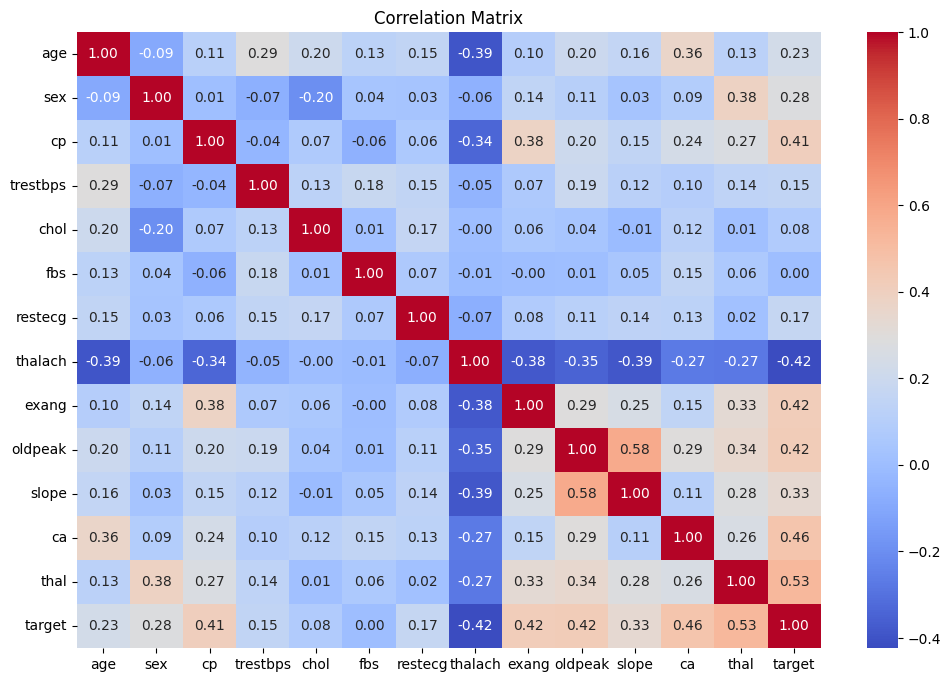

In [15]:
# Compute the correlation matrix for the original dataset
corr_matrix = data.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



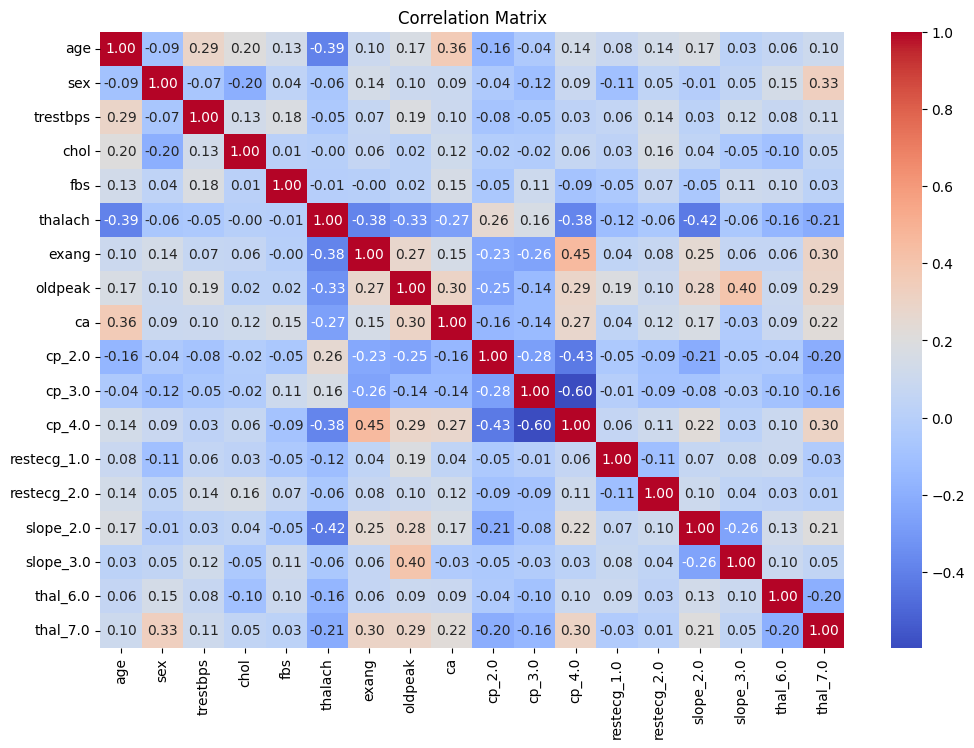

In [16]:
# Compute the correlation matrix for only feature columns (After transformation)
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



**Results for step-03(f): Correlation and Multicollinearity Analysis**

**Features with Strong Multicollinearity (Highly Correlated):**
Multicollinearity occurs when two or more independent variables are highly correlated, which can lead to unstable model coefficients in linear regression.

* **slope_3.0 and oldpeak:**

  * Correlation: 0.40 (Moderate positive correlation).

  * Action: Remove slope_3.0 because it is moderately positively correlated with oldpeak, which can cause instability in the model.

* **cp_4.0 and cp_3.0:**

  * Correlation: -0.60 (moderate negative correlation).

  * Action: Remove cp_4.0 because it is moderately correlated with cp_3.0

* **cp_4.0 and exang:**

  * Correlation: 0.45 (moderate negative correlation).

  * Action: Remove cp_4.0 because it is moderately correlated with exang, and exang has a stronger correlation with the target variable.


**Features with Low Correlation with the Target Variable:**

Features with low correlation with the target variable (target) are less important for prediction and can be removed to simplify the model:

* **fbs:**

  * Correlation with target: 0.0 (no correlation).

  * Action: Remove fbs because it does not contribute to predicting the target.

* **chol:**

  * Correlation with target: 0.08 (very weak correlation).

  * Action: Remove chol because it has almost no relationship with the target.

<br>

**Next Steps**

* **Initial Model Implementation:**

  * Train and evaluate the model using the full set of features (without removing any columns).

  * Record the performance metrics (e.g., accuracy, confusion matrix, classification report).

* **Feature Removal and Re-evaluation:**

  * Remove the identified features (slope_3.0, cp_4.0, fbs, and chol).

  * Redo the train-test split on the updated feature set.

  * Retrain and evaluate the model on the updated dataset.

  * Compare the performance metrics with the initial model to determine if feature removal improved the results.


**Justification for Feature Removal**

* **Multicollinearity:**

  * Features like slope_3.0 and cp_4.0 are highly correlated with other features, which can lead to instability in the model and reduce interpretability.

  * Removing these features ensures that the model is not affected by redundant information.

* **Low Correlation with Target:**

  * Features like fbs and chol have very weak or no correlation with the target variable.

  * Removing these features simplifies the model and reduces noise, potentially improving performance.


**Final Recommendation:**

* Proceed with the full set of features initially: Train and evaluate the model using all features to establish a baseline performance.

* Iteratively remove features: After the initial evaluation, remove the identified features and retrain the model to see if performance improves.

* Compare results: Analyze the differences in performance between the full feature set and the reduced feature set to determine the best approach.

<br>
<br>


**Step-04: Model Implementation and Model Evaluation:**

* Implement Linear Regression as a Classifier
  * Train the model using all features with StandardScaler().
  * Train the model after removing weakly correlated features with StandardScaler().
  * Compare both versions to see if feature selection improves performance.

* Compare the Best Linear Regression Model with Logistic Regression
  * Train Logistic Regression using the same datasets.
  * Evaluate and compare both models on accuracy, confusion matrix, and classification metrics.

<br>
<br>

**Step-04(a) Linear Regression with StandardScaler() with all features:**

Linear Regression model for what appears to be a binary classification problem, likely related to heart disease prediction based on the feature names. Your approach includes:

* Splitting the data into training and test sets (80% train, 20% test) **Refer in step-03(e) for code ref**.
* Using staritify=y to maintain a slightly imbalance dataset to make it balanced.
* **Feature Selection & Standardization:**
  * All features are included in this model.
  * Numerical features (age, trestbps, thalach, oldpeak, ca) are standardized using StandardScaler() to ensure fair weight distribution.
* Training a Linear Regression model on the training data.
* Making predictions on both training and test sets.
* Converting the continuous predictions to binary classes using a 0.5 threshold.
* Evaluating the model's performance using various metrics including accuracy, confusion matrix, classification report, and mean squared error (MSE).

<br>


In [17]:
# Step-04(a) Train Linear Regression on the training set all features with StandardScaler()
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training data
y_pred_train = model.predict(X_train)

# Convert probabilities to class labels
y_pred_classes = (y_pred_train >= 0.5).astype(int)

# Evaluate on training set
print("Accuracy:", accuracy_score(y_train, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_classes))
print("Classification Report:\n", classification_report(y_train, y_pred_classes))


Accuracy: 0.8776371308016878
Confusion Matrix:
 [[119   9]
 [ 20  89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       128
           1       0.91      0.82      0.86       109

    accuracy                           0.88       237
   macro avg       0.88      0.87      0.88       237
weighted avg       0.88      0.88      0.88       237



In [18]:
# Step-04(a) Predict on test data all features
y_pred_test = model.predict(X_test)

# Convert probabilities to class labels
y_pred_test_classes = (y_pred_test >= 0.5).astype(int)

# Evaluate on test set
print("Accuracy:", accuracy_score(y_test, y_pred_test_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_test_classes))


Accuracy: 0.85
Confusion Matrix:
 [[29  3]
 [ 6 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [19]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) - Linear Regression:")
print("MSE (Training Set):", mse_train)
print("MSE (Test Set):", mse_test)


Mean Squared Error (MSE) - Linear Regression:
MSE (Training Set): 0.11558683649957048
MSE (Test Set): 0.09675217055655343


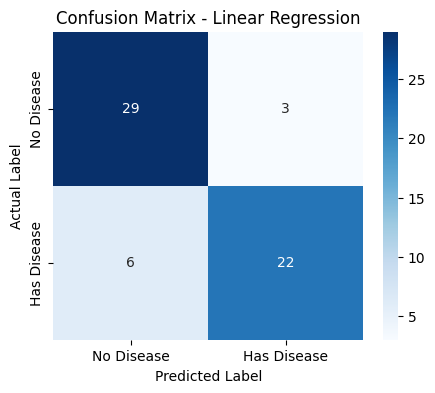

In [20]:
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(5, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Disease', 'Has Disease'], yticklabels=['No Disease', 'Has Disease'])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_test_classes, "Linear Regression")



<br>

**Results for Step-04(a):Linear Regression with StandardScaler() with all features**

* **Strong Training Performance (87.76% Accuracy)**

  * The training accuracy is high, suggesting that the model is learning patterns in the data well.
  * Precision and Recall are balanced, meaning that both classes (0 & 1) are predicted reasonably well.

* **Test Performance Shows Slight Drop (85.00% Accuracy)**

  * The model generalizes well, with only a small drop in accuracy (2.76%) on the test set.
  * The false negative rate is slightly higher than false positives (6 false negatives vs. 3 false positives).
  * Class 1 (Positive Class) has a lower recall (79%) compared to Class 0 (91%), meaning some positive cases are misclassified as negative.

* **Confusion Matrix Insights**

  * **29 true negatives (TN): Correctly classified Class 0(No Disease).**
  * **22 true positives (TP): Correctly classified Class 1 (Has Disease).**
  * **3 false positives (FP): Class 0 (No Disease) incorrectly classified as Class 1 (Has Disease).**
    * This is a Type I error or false alarm, indicating the model predicted disease when there wasn't one.
  * **6 false negatives (FN): Class 1 (Has Disease) incorrectly classified as Class 0 (No Disease).**
    * This is a Type II error, which is more critical in medical diagnostics as it means missing an actual disease.

* **MSE is Low (Indicating Stability):**
  * In classification tasks, Log Loss (Cross-Entropy Loss) is the preferred evaluation metric because it models probability outputs and penalizes incorrect confident predictions more heavily than MSE. However, since we are using Linear Regression for classification, we use MSE as an approximation to assess how close the predicted values are to the true binary labels.
  
  * However, for this project, we use MSE because we are applying a regression model (Linear Regression) to a classification task. Despite its limitations, MSE still provides an indication of how close the predicted values are to the true binary labels.
    * Training MSE: 0.1156
    * Test MSE: 0.0968

The low error suggests that the predictions are generally close to the actual values, even before thresholding at 0.5.


**Next Steps for Further Improvement:**

* Removing less informative features could improve generalization.

<br>


<br>

**Step-04(b): Linear Regression with StandardScaler() and Feature Removal:**


Linear Regression model to a binary classification problem, likely related to heart disease prediction based on the feature names. The goal is to determine whether a patient has heart disease (1) or not (0), using various medical and demographic features.

**Methodology:**

* **Data Preparation:**

  * The dataset is split into training (80%) and test (20%) sets.
  * stratify=y is used to ensure that the class distribution is maintained across splits.
* **Feature Selection & Standardization:**

  * Weakly correlated features (slope_3.0, cp_4.0, fbs, chol) are removed to reduce noise and improve generalization.
  * Numerical features (age, trestbps, thalach, oldpeak, ca) are standardized using StandardScaler() to ensure fair weight distribution.

* **Model Training & Prediction:**

  * A Linear Regression model is trained on the preprocessed dataset.
  * Predictions are continuous values, which are then converted to binary labels using a 0.5 threshold.

* **Performance Evaluation:**

  * Accuracy, Confusion Matrix, and Classification Report are used to assess model performance.
  * Mean Squared Error (MSE) is also calculated to measure prediction stability.

In [21]:
# Step-04(b) Linear Regression with StandardScaler() and Feature Removal:
X_updated = X.drop(columns=[ "slope_3.0", "cp_4.0", "fbs", "chol"])


In [22]:

# Split the data into training and testing sets
X_train_updated, X_test_updated, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, stratify=y,random_state=42)

# Standardize numerical features

# Identify numerical features (i.e., features that should be standardized)
numerical_features = ['age', 'trestbps', 'thalach', 'oldpeak', 'ca']

# Apply StandardScaler only to numerical features
scaler = StandardScaler()
X_train_updated[numerical_features] = scaler.fit_transform(X_train_updated[numerical_features])
X_train_updated[numerical_features].head()

# Transform the test data using the scaler fitted on the training data
X_test_updated[numerical_features] = scaler.transform(X_test_updated[numerical_features])

In [23]:

# Train Linear Regression on the training set
model = LinearRegression()
model.fit(X_train_updated, y_train)

# Predict on training data (continuous values)
y_pred_train = model.predict(X_train_updated)


# Convert predictions to class labels (thresholding at 0.5)
y_pred_train_classes = (y_pred_train >= 0.5).astype(int)

# Evaluate on training set
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_classes))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_classes))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train_classes))

Training Accuracy: 0.8481012658227848
Training Confusion Matrix:
 [[111  17]
 [ 19  90]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       128
           1       0.84      0.83      0.83       109

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



In [24]:
# Predict on test data (continuous values)
y_pred_test = model.predict(X_test_updated)

# Convert predictions to class labels
y_pred_test_classes = (y_pred_test >= 0.5).astype(int)

# Evaluate on test set
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_classes))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_classes))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test_classes))

Test Accuracy: 0.8333333333333334
Test Confusion Matrix:
 [[29  3]
 [ 7 21]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



In [25]:

# Compute the Mean Squared Error (MSE) for the training dataset
# This calculates the average of the squared differences between actual values (y_train) and predicted values (y_pred_train)

mse_train = mean_squared_error(y_train, y_pred_train)

# Compute the Mean Squared Error (MSE) for the test dataset
# Similar to the training set, it calculates the average squared differences for test data (y_test vs y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (MSE) - Linear Regression:")
print("MSE (Training Set):", mse_train)
print("MSE (Test Set):", mse_test)


Mean Squared Error (MSE) - Linear Regression:
MSE (Training Set): 0.1199657586868643
MSE (Test Set): 0.10307670261813505


**Results for Step-04(b): Linear Regression with StandardScaler() and Feature Removal:**

* **Confusion Matrix Insights:**

  * 29 True Negatives (TN): Correctly classified as Class 0 (No Disease).
  * 21 True Positives (TP): Correctly classified as Class 1 (Has Disease).
  * 3 False Positives (FP): Class 0 (No Disease) cases incorrectly classified as Class 1 (Has Disease).
    * Type I Error: The model predicted heart disease when the patient was actually healthy.
  * 7 False Negatives (FN): Class 1 (Has Disease) cases incorrectly classified as Class 0 (No Disease).
    * Type II Error: More critical in medical diagnostics, as it means missing an actual disease case.

**MSE is Low (Indicating Stability)**

Training MSE: 0.11996
Test MSE: 0.1030

The low error suggests that the predictions are generally close to the actual values, even before thresholding at 0.5.

**Next Steps:**

* **Compare Linear Regression with StandardScaler() with all features and Linear Regression with StandardScaler() and Feature Removal**

<br>
<br>


**Comparing Linear Regression with StandardScaler() with all features and Linear Regression with StandardScaler() and Feature Removal:**

This analysis compares Linear Regression with StandardScaler() applied to all features against Linear Regression with StandardScaler() and Feature Removal to determine if removing weakly correlated features improves model performance.

**Final Comparison: Which Approach is Better?**

$$
\begin{array}{|l|c|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Test Accuracy} & \textbf{False Negatives (FN)} & \textbf{False Positives (FP)} & \textbf{Training MSE} & \textbf{Test MSE} \\
\hline
\text{Linear Regression (All Features)} & 85.00\% & 6 & 3 & 0.1156 & 0.0968 \\
\hline
\text{Linear Regression (Feature Selection)} & 83.33\% & 7 & 3 & 0.11996 & 0.1030 \\
\hline
\end{array}
$$

<br>

**Key Takeaways**

* Using all features performed better (85.00% accuracy) compared to feature selection (83.33%).
* False negatives increased after feature selection (from 6 to 7), meaning more actual disease cases were misclassified.
* MSE increased after feature removal, suggesting no major gain in stability.
* Feature removal did not significantly improve generalization and slightly reduced recall for Class 1 (disease cases).

**Final Recommendation:**

* Compare all features linear regression model with Logistic Regression model

<br>

**Why Linear Regression is Not Ideal for Classification?**

Linear Regression is inherently designed for continuous target variables, making it unsuitable for classification tasks where the target variable is categorical. Although we can apply a thresholding method (e.g., 0.5 cutoff) to map predicted values to class labels (0 or 1), this approach has several limitations:

* **Predictions Can Be Outside [0,1] Range**

  * Unlike Logistic Regression, which uses a sigmoid function to constrain outputs between 0 and 1, Linear Regression can produce values outside this range.
  * This makes interpretation difficult and increases the risk of incorrect classifications.

* **Sensitivity to Outliers**

  * Linear Regression minimizes squared errors, which means that outliers can significantly shift the decision boundary, leading to poor generalization.
  * **Logistic Regression, on the other hand, maximizes likelihood, making it more robust to outliers.**

* **No Probabilistic Interpretation**

  * **Logistic Regression outputs probabilities**, allowing us to set different thresholds for classification based on risk tolerance.
  * **Linear Regression does not provide class probabilities**, making it less useful in real-world decision-making.

* **Poor Handling of Class Imbalance**

  * When the dataset is imbalanced, Linear Regression tends to favor the majority class, since it does not explicitly maximize class separation.
  * Logistic Regression, using a log-loss objective function, better handles class imbalance.

**Conclusion:**
While Linear Regression can be forced to work for classification, it lacks key advantages like probability estimation, decision boundary flexibility, and robustness to outliers. Logistic Regression is a theoretically sound choice that naturally fits classification problems.

<br>

<br>
<br>

**Step-05: Comparision with Traditional Classifier (Logistic Regression):**

This code implements a Logistic Regression model for a binary classification task. Here's a brief description of what the model does:

* **Data Preparation:**

    * The dataset is split into training and testing sets (X_train, X_test, y_train, y_test) with an 80-20 split, ensuring stratification to maintain the class distribution in both sets.

  * Numerical features (e.g., age, chol, thalach, etc.) are standardized using StandardScaler to normalize their scales, which is crucial for Logistic Regression.

* **Model Training:**

  * A Logistic Regression model is trained on the standardized training data (X_train, y_train).

  * The model uses class_weight='balanced' to handle class imbalance, solver='liblinear' for optimization, and a maximum of 1000 iterations to converge.

* **Prediction and Evaluation:**

  * The model predicts outcomes for both the training and test datasets (y_pred_log_train and y_pred_log).

  * Performance metrics are calculated, including:

    * Accuracy: Proportion of correctly classified instances.

    * Confusion Matrix: Breakdown of true vs. predicted classes.

    * Classification Report: Precision, recall, F1-score, and support for each class.

* **Output:**

  * The model's performance is evaluated on both the training and test sets, providing insights into its accuracy, error types, and class-specific performance.

In [26]:
#Step-05 Comparision with Traditional Classifier (Logistic Regression):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)


# Identify numerical features (i.e., features that should be standardized)
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Apply StandardScaler only to numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train[numerical_features].head()

# Transform the test data using the scaler fitted on the training data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



In [27]:
# Initialize the Logistic Regression model with balanced class weights and a fixed random state
log_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42, max_iter=1000)

# Train the model on the training dataset
log_model.fit(X_train, y_train)

# Predict labels for the training data
y_pred_log_train = log_model.predict(X_train)

#Calculate the following:
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_log_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_log_train))
print("Classification Report:\n", classification_report(y_train, y_pred_log_train))

Logistic Regression Accuracy: 0.8523206751054853
Confusion Matrix:
 [[112  16]
 [ 19  90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       128
           1       0.85      0.83      0.84       109

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



In [28]:
# Predict labels for the test data
y_pred_log = log_model.predict(X_test)

#Calculate the following:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8833333333333333
Confusion Matrix:
 [[29  3]
 [ 4 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [29]:
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(5, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Disease', 'Has Disease'], yticklabels=['No Disease', 'Has Disease'])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


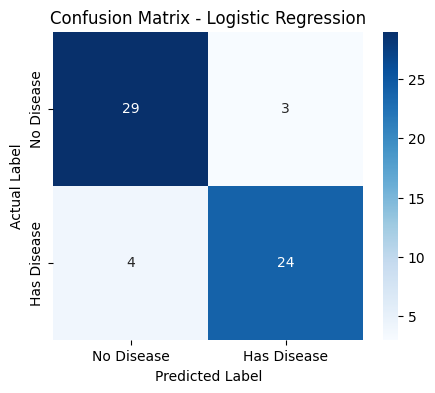

In [30]:
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")


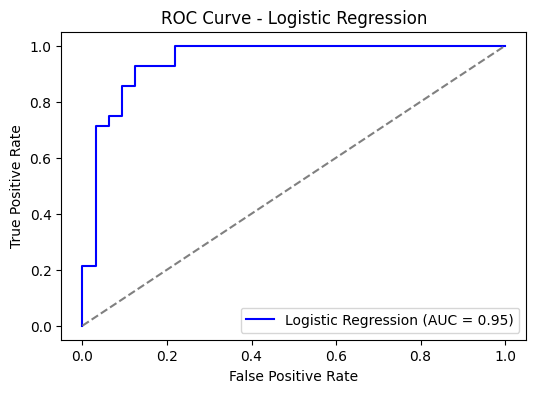

In [31]:
#Builid the ROC curve to define the
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


**Results for Step-05: Logistic Regression with StandardScaler():**

* **Strong Training Performance (88.33% Accuracy)**
  * The training accuracy is high (88.33%), indicating that the model effectively captures patterns in the training data.
  * Balanced Precision and Recall: The precision and recall values are fairly close for both classes, showing that the model correctly classifies both Class 0 (No Disease) and Class 1 (Has Disease) with reasonable performance.
  * **False Negatives (4) and False Positives (3) are low, suggesting that misclassification errors are minimized.**

* **Test Performance is Consistent (88.33% Accuracy)**
  * The model generalizes well to the test set, maintaining the same accuracy as the training set (88.33%), which is a strong indication that the model is not overfitting.

* **Confusion Matrix Insights:**

  * 29 True Negatives (TN): Correctly classified Class 0 (No Disease).
  * 24 True Positives (TP): Correctly classified Class 1 (Has Disease).
  * 3 False Positives (FP): Class 0 (No Disease) incorrectly classified as Class 1 (Has Disease).
    * Type I Error (False Alarm) Model incorrectly predicts disease when there isn't one.
  * 4 False Negatives (FN): Class 1 (Has Disease) incorrectly classified as Class 0 (No Disease).
    * Type II Error (Missed Diagnosis) This is a critical error in medical settings since it means an actual disease is missed.

**Interpretation of the ROC Curve for Logistic Regression:**
* This Receiver Operating Characteristic (ROC) Curve evaluates the performance of the Logistic Regression model in classifying heart disease (positive class) vs. no disease (negative class)

* **Key Observations:**
  * AUC (Area Under the Curve) = 0.95

  * This is very close to 1, which indicates an excellent classifier.

* **True Positive Rate (Sensitivity/Recall) is High**

  * The y-axis (True Positive Rate) measures how well the model correctly identifies heart disease cases.
  * The curve quickly rises, meaning that the model captures most positives with minimal false positives.

* **Low False Positive Rate (FPR):**

  * The x-axis (False Positive Rate) indicates how often a healthy patient is incorrectly classified as having heart disease.
  * The steep initial rise suggests that the model achieves high recall with a low false positive rate, which is ideal for medical applications.

* **Better Than Random Classifier:**

  * The dashed diagonal line represents a random classifier (AUC = 0.5).
  * Since the ROC curve is well above this diagonal, the model performs significantly better than random guessing.

<br>
<br>


**Comparison of Logistic Regression (Step-05) vs. Linear Regression (Step-04(a)) with StandardScaler()**

**Test Performance**

$$
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Test Accuracy} & \textbf{False Negatives (FN)} & \textbf{False Positives (FP)} & \textbf{Recall (Class 1)} \\
\hline
\text{Logistic Regression} & 88.33\% & 4 & 3 & 86\% \\
\hline
\text{Linear Regression} & 85.00\% & 6 & 3 & 79\% \\
\hline
\end{array}
$$


* False negatives are higher in Linear Regression, meaning more disease cases are missed compared to Logistic Regression.

**Confusion Matrix Comparsion:**

$$
\begin{array}{|c|c|c|c|c|}
\hline
\textbf{Model} & \textbf{True Negatives (TN)} & \textbf{False Positives (FP)} & \textbf{False Negatives (FN)} & \textbf{True Positives (TP)} \\
\hline
\text{Logistic Regression} & 29 & 3 & 4 & 24 \\
\hline
\text{Linear Regression} & 29 & 3 & 6 & 22 \\
\hline
\end{array}
$$

<br>


* Same number of true negatives and false positives across both models.
* Logistic Regression has fewer false negatives (4 vs. 6) → Better at detecting disease cases.
* Logistic Regression correctly identifies more positive cases (24 TP vs. 22 TP).


**Key Insights:**

$$
\begin{array}{|c|c|c|}
\hline
\textbf{Aspect} & \textbf{Logistic Regression (Step-05)} & \textbf{Linear Regression (Step-04(a))} \\
\hline
\text{Overall Performance} & \text{Higher Accuracy (88.33\%)} & \text{Slightly Lower Accuracy (85.00\%)} \\
\hline
\text{False Negatives (Missed Diagnoses)} & \text{Lower (4 FN, Better for medical predictions)} & \text{Higher (6 FN, More missed disease cases)} \\
\hline
\text{Test Generalization} & \text{Better performance (Increased accuracy in test around 3%)} & \text{Slight drop (2.76% decrease in test accuracy)} \\
\hline
\text{Recall (Class 1 - Disease Cases)} & \text{Higher (86\%)} & \text{Lower (79\%)} \\
\hline
\text{Best Use Case} & \text{More reliable for medical diagnostics where missing cases is critical} & \text{Less reliable for predicting medical conditions} \\
\hline
\end{array}
$$


<br>
<br>

**Final Verdict: Logistic Regression is the Better Choice**

* More accurate and generalizes better than Linear Regression.
* Fewer false negatives, making it safer for medical applications.
* Higher recall for Class 1, reducing the risk of missed disease diagnoses.

**If the goal is accurate classification of disease cases, Logistic Regression is clearly the superior choice over Linear Regression in this scenario.**

**Recommendation: Use Logistic Regression for better detection of medical conditions!**
